In [3]:
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [4]:
%flake8_on

In [5]:
import requests

URL = "https://www.wikidata.org/w/api.php"

participant_page = "Wikidata:WikiProject_COVID-19/Participants"

PARAMS = {
        "action": "query",
        "prop": "revisions",
        "titles": participant_page,
        "rvprop": "timestamp|user",
        "rvslots": "main",
        "rvlimit": "200",
        "formatversion": "2",
        "format": "json"
    }

S = requests.Session()
R = S.get(url=URL, params=PARAMS)
DATA = R.json()
PAGES = DATA["query"]["pages"]


In [6]:
len(PAGES[0]['revisions'])

71

In [7]:
import pandas as pd

project_users = pd.json_normalize(PAGES[0]['revisions'])

In [8]:
def convert_timestamp_to_datetime(timestamp):
    time_in_datetime_format = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%SZ")
    return(time_in_datetime_format)




2:80: E501 line too long (80 > 79 characters)


In [9]:
from datetime import datetime
project_users["datetime_timestamp"] = [convert_timestamp_to_datetime(each_timestamp) for each_timestamp in project_users["timestamp"]]

In [15]:
project_users

,user,timestamp,anon,datetime_timestamp
0,LaMèreVeille,2020-04-20T16:26:42Z,NaN,2020-04-20 16:26:42
1,Julian leonardo paez,2020-04-15T06:07:24Z,NaN,2020-04-15 06:07:24
2,Sj,2020-04-14T13:04:28Z,NaN,2020-04-14 13:04:28
3,EricaAzzellini,2020-04-14T12:55:02Z,NaN,2020-04-14 12:55:02
4,EricaAzzellini,2020-04-14T12:51:02Z,NaN,2020-04-14 12:51:02
...,...,...,...,...
66,Chchowmein,2020-03-16T02:48:33Z,NaN,2020-03-16 02:48:33
67,Chchowmein,2020-03-16T02:48:18Z,NaN,2020-03-16 02:48:18
68,Jodi.a.schneider,2020-03-16T02:45:14Z,NaN,2020-03-16 02:45:14
69,Daniel Mietchen,2020-03-16T01:42:38Z,NaN,2020-03-16 01:42:38


In [16]:
project_users_without_duplicates = project_users.sort_values('datetime_timestamp', ascending=True).drop_duplicates('user').sort_index()

In [17]:
project_users_without_duplicates_sorted = project_users_without_duplicates.sort_values('datetime_timestamp', ascending=True)
project_users_without_duplicates_sorted = project_users_without_duplicates_sorted.reset_index()
project_users_without_duplicates_sorted["index"] = project_users_without_duplicates_sorted.index

1:80: E501 line too long (124 > 79 characters)
2:80: E501 line too long (95 > 79 characters)


In [30]:

today_mock_user = pd.DataFrame({"user": ["mock"],
                                "timestamp": ["mock"],
                                "datetime_timestamp": [datetime.today()],
                                "index": [max(project_users_without_duplicates_sorted["index"])]
                                })

project_users_without_duplicates_sorted = project_users_without_duplicates_sorted.append(today_mock_user)

5:80: E501 line too long (96 > 79 characters)


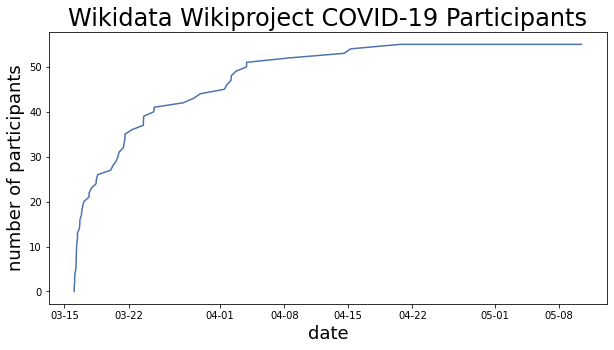

4:1: E302 expected 2 blank lines, found 1
7:9: E128 continuation line under-indented for visual indent
8:1: W293 blank line contains whitespace
19:80: E501 line too long (106 > 79 characters)


In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_participant_curve(project_users_without_duplicates_sorted):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(project_users_without_duplicates_sorted["datetime_timestamp"],
        project_users_without_duplicates_sorted["index"])
    
    date_format = mdates.DateFormatter('%m-%d')
    ax.xaxis.set_major_formatter(date_format)
    plt.style.use('seaborn-deep')
    plt.title("Wikidata Wikiproject COVID-19 Participants", fontsize=24)
    plt.xlabel('date', fontsize=18)
    plt.ylabel('number of participants', fontsize=18)


plot_participant_curve(project_users_without_duplicates_sorted)

covid19_participant_curve_file = "fig/participants_covid19_" + datetime.today().strftime('%m-%d') + ".png"
plt.savefig(covid19_participant_curve_file, dpi=200, transparent=True)